# Proyecto sobre los precios de las casas en Boston

Puntos a tratar:
- Descripcion del dataset
- Analisis exploratorio
- Correlacion
- Multicolinealidad
- Analisis missing
- Ajuste del modelo
- Prueba de supuestos del modelo

## Cargar datos

In [1]:
# librerias
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
# cargar datos
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/jbernal/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

De la descripcion de los datos vemos que hay 506 registros y 14 variables. Se suele utilizar como variable objetivo a *MEDV*. Los datos no contienen valores faltantes.

El objetivo es crear un modelo que prediga el Precio promedio de una casa *MEDV* segun algunas caracteristicas de la misma.

In [3]:
# variables predictoras en formato dataframe
X_orig = pd.DataFrame(boston.data, columns=boston.feature_names)
X_orig.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# variable objetivo en formato de Serie
y_orig = pd.Series(boston.target, name='MEDV')
y_orig[0:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Datos de entrenamiento y de prueba

In [5]:
# librerias de visualizacion
# muestra el grafico debajo del codigo
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Libreria para dividir los datos
from sklearn.model_selection import train_test_split

In [7]:
# Creamos los dos conjuntos de datos
# divide los datos en 75% para entrenamiento y 25% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, random_state=1)

In [8]:
# juntamos los datos entrenamiento en un datframe para futuros tratamientos
df = pd.concat([X_train, y_train], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36,23.1


## EDA

**Los datos de entrenamiento contienen valores nulos?**

In [9]:
X_train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
y_train.isna().sum()

0

No poseen valores faltantes

**Resumen estadistico de las variables predictoras**

In [11]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- El promedio de la tasa de criminalidad es de 3.8, con una desviacion estandar de 9.37. Esta gran diferencia entre ambas metricas indican que los datos se encuentran muy dispersos. El valor minimo y maximo va de 0.006 a 88.9 lo que indica que hay zonas mucho mas seguras que otras.

- La distribucion de las zonas industriales tienen un comportamiento normal centrando gran parte de las zonas alrededor de la media.

- CHAS es una variable binaria e indica que el 8% de casas estan cercanas al rio. Como solo posee como valor cero y uno, al promediar nos da la proporcion de unos.

- La proporcion de casas ocupadas por los duenos

**Resumen estadistico de la variable objetivo**

In [12]:
y_train.describe()

count    379.000000
mean      22.344591
std        8.920931
min        5.000000
25%       17.100000
50%       20.800000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

- Indica que el promedio del precio de las casas es de 22.000 con un valor minimo y maximo de 5000 y 50.000 respectivamente

**Analisis de Correlacion**

Veamos la correlacion entre las variables predictoras

In [13]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195484,0.389041,-0.064685,0.403533,-0.206140,0.348293,-0.370307,0.607924,0.570912,0.282849,-0.372070,0.442998
ZN,-0.195484,1.000000,-0.544895,-0.035765,-0.520324,0.336601,-0.588529,0.700130,-0.318524,-0.312923,-0.403056,0.169418,-0.420601
INDUS,0.389041,-0.544895,1.000000,0.036735,0.768276,-0.388148,0.646452,-0.713545,0.586062,0.704795,0.387252,-0.353812,0.598079
CHAS,-0.064685,-0.035765,0.036735,1.000000,0.098402,0.101530,0.067883,-0.092186,-0.009136,-0.044917,-0.119846,0.046263,-0.047730
NOX,0.403533,-0.520324,0.768276,0.098402,1.000000,-0.325283,0.726234,-0.764939,0.608815,0.670951,0.189482,-0.388886,0.598603
RM,-0.206140,0.336601,-0.388148,0.101530,-0.325283,1.000000,-0.286281,0.248623,-0.200272,-0.267035,-0.355134,0.136416,-0.611438
AGE,0.348293,-0.588529,0.646452,0.067883,0.726234,-0.286281,1.000000,-0.752379,0.456785,0.509776,0.278642,-0.290676,0.637677
DIS,-0.370307,0.700130,-0.713545,-0.092186,-0.764939,0.248623,-0.752379,1.000000,-0.490342,-0.537312,-0.241096,0.286775,-0.510071
RAD,0.607924,-0.318524,0.586062,-0.009136,0.608815,-0.200272,0.456785,-0.490342,1.000000,0.919322,0.465916,-0.442095,0.475813
TAX,0.570912,-0.312923,0.704795,-0.044917,0.670951,-0.267035,0.509776,-0.537312,0.919322,1.000000,0.464998,-0.439585,0.525850


- Hay una alta correlacion entre CRIM y RAD (60.7%).
- Hay una alta correlacion entre INDUS Y TAX (70.4%).
- Hay una alta correlacion entre TAX y RAD (91.9%).
- Notemos que los impuestos (TAX) estan muy correlacionado con las zonas industriales (INDUS) y con la distancia a las autopistas (RAD). Debemos investigar si existe colinealidad entre ellas para luego ser tratada.

Ahora vamos a visualizar la correlacion entre todas las variables mediante un mapa de calor

<AxesSubplot:>

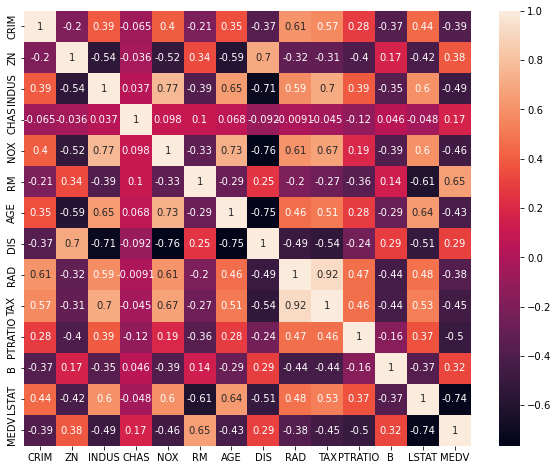

In [19]:
# mapa de calor
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True)

Vemos una alta correlacion de la variable objetivo (Precio promedio de las casas MEDV) con:
- Las zonas industriales (INDUS) de -0.49.
- El estatus mas bajo de la poblacion (LSTAT). Tiene la mayor correlacion (de -0.74)
- La concentracion de oxido nitrico (NOX) de -0.46.
- El numero de habitaciones por vivienda (RM) de 0.65.